<a href="https://colab.research.google.com/github/KoalaGeo/HMO_Registry_Notebooks/blob/main/HMO_Loughborough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps as cm
import numpy as np

In [ ]:
csv_path = "/content/drive/MyDrive/Documents/Houses/9 Forest Road/Planning Objection/Round 2/HMO List historical.csv"  # Replace with the actual path
df = pd.read_csv(csv_path, parse_dates=['licence_start', 'licence_expiry'])

print(df.head(20))  # View the first few rows of the data

    refno          uprn address1 houseno              street  \
0    1051  1.000305e+11      NaN     133      Station Street   
1    1008  1.000305e+11      NaN      26        Radmoor Road   
2    1009  1.000400e+10      NaN       1     Goldfinch Close   
3    1010  1.000400e+10      NaN       5     Goldfinch Close   
4    1011  1.000305e+11      NaN      63      Leopold Street   
5    1012  1.000305e+11      NaN      67      Station Street   
6    1015  1.000400e+10      NaN      54      Kingfisher Way   
7    1017  1.000305e+11      NaN      51      William Street   
8    1018  1.000304e+11      NaN      14       Arthur Street   
9    1019  1.000304e+11      NaN     104          Derby Road   
10   1021  1.000400e+10      NaN      25       Chaplin Close   
11   1022  1.000815e+10      NaN      49    Goods Yard Close   
12   1023  1.000305e+11      NaN      61      William Street   
13   1024  1.000305e+11      NaN      13        Radmoor Road   
14   1027  1.000305e+11      NaN      12

<ipython-input-3-e8afb4a679e7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(csv_path, parse_dates=['licence_start', 'licence_expiry'])
<ipython-input-3-e8afb4a679e7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(csv_path, parse_dates=['licence_start', 'licence_expiry'])


In [ ]:
# Get descriptive statistics
summary = df.describe()
print(summary)

             refno          uprn                  licence_start  \
count  1017.000000  1.015000e+03                           1014   
mean   4211.211406  8.674710e+10  2018-09-02 06:13:29.467455488   
min     889.000000  1.000400e+10            2007-07-13 00:00:00   
25%    1233.000000  1.000304e+11            2017-10-05 00:00:00   
50%    4703.000000  1.000304e+11            2019-01-21 00:00:00   
75%    6565.000000  1.000305e+11            2020-05-27 00:00:00   
max    8589.000000  2.000008e+11            2023-07-27 00:00:00   
std    2621.959817  3.252302e+10                            NaN   

                      licence_expiry         Beds           HH  
count                           1014  1017.000000  1017.000000  
mean   2023-06-05 18:48:59.644970496     5.945919     5.913471  
min              2010-09-16 00:00:00     0.000000     0.000000  
25%              2022-03-15 00:00:00     5.000000     5.000000  
50%              2023-11-26 12:00:00     6.000000     6.000000  
75%   

# Testing Count for 1 Year

In [ ]:
# Filter data for licenses potentially valid in 2023 (considering both start and end year)
df_filtered = df[
    (df['licence_start'].dt.year <= 2023) & (df['licence_expiry'].dt.year >= 2023)
]


# Count the number of unique uprn values
count_unique_uprn = df_filtered['uprn'].nunique()

# Print the count
print(count_unique_uprn)

659


In [ ]:
# Create a dictionary to store street name counts
street_counts2023 = df_filtered['street'].value_counts().to_dict()

# Print the table (one way to display the results)
print("Year: 2023")
print(pd.DataFrame.from_dict(street_counts2023, orient='index', columns=['Count']))

Year: 2023
                Count
Leopold Street     34
Storer Road        26
Ashby Road         24
York Road          22
Arthur Street      20
...               ...
Ashby Square        1
Soar Road           1
Wallace Road        1
Bridge Street       1
George Street       1

[143 rows x 1 columns]


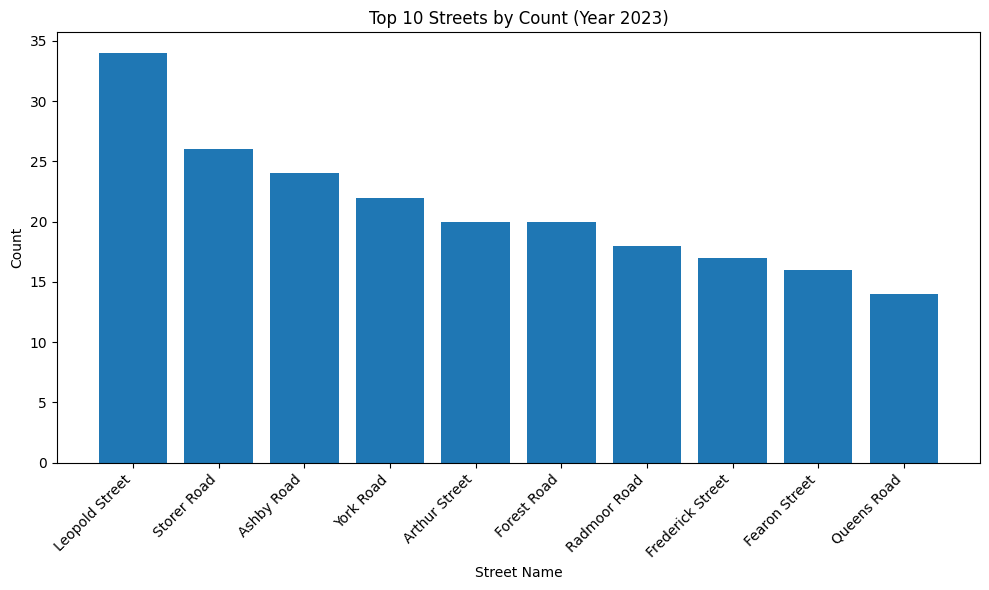

In [ ]:
# Sort the dictionary by count (descending order) and get the top 10 entries
top_10_streets = dict(sorted(street_counts2023.items(), key=lambda item: item[1], reverse=True)[:10])

# Extract street names and counts as separate lists for the chart
street_names2023 = list(top_10_streets.keys())
street_counts2023 = list(top_10_streets.values())

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.bar(street_names2023, street_counts2023)
plt.xlabel('Street Name')
plt.ylabel('Count')
plt.title('Top 10 Streets by Count (Year 2023)')
plt.xticks(rotation=45, ha='right')  # Rotate street names for readability

# Display the chart
plt.tight_layout()
plt.show()

# Count for Range of All Years

In [ ]:
# Define year range (consider all years for filtering based on licence dates)
yearshist = df['licence_start'].dt.year.unique().tolist()  # Extract unique start years
yearshist.extend(df['licence_expiry'].dt.year.unique().tolist())  # Add unique expiry years
yearshist = sorted(set(yearshist))  # Remove duplicates and sort in ascending order

# Create a dictionary to store year-wise counts
uprn_counts_by_year_hist = {}

for year in yearshist:
  # Filter data for licenses potentially valid in the current year
  year_data_hist = df[
      (df['licence_start'].dt.year <= year) & (df['licence_expiry'].dt.year >= year)
  ]

  # Count the number of unique uprn values for the year
  uprn_counts_by_year_hist[year] = year_data_hist['uprn'].nunique()

# Prepare data for chart (assuming you want a bar chart)
data_hist = pd.DataFrame.from_dict({'year': list(uprn_counts_by_year_hist.keys()), 'uprn_count': list(uprn_counts_by_year_hist.values())})

# Print the year-wise counts
print(uprn_counts_by_year_hist)


{2007.0: 16, 2008.0: 21, 2009.0: 28, 2010.0: 30, 2011.0: 28, 2012.0: 29, 2013.0: 47, 2014.0: 92, nan: 0, 2015.0: 137, 2016.0: 175, 2017.0: 277, 2018.0: 461, 2019.0: 626, 2020.0: 660, 2021.0: 695, 2022.0: 703, 2023.0: 659, 2024.0: 454, 2025.0: 260, nan: 0, 2026.0: 172, 2027.0: 98, 2028.0: 21}


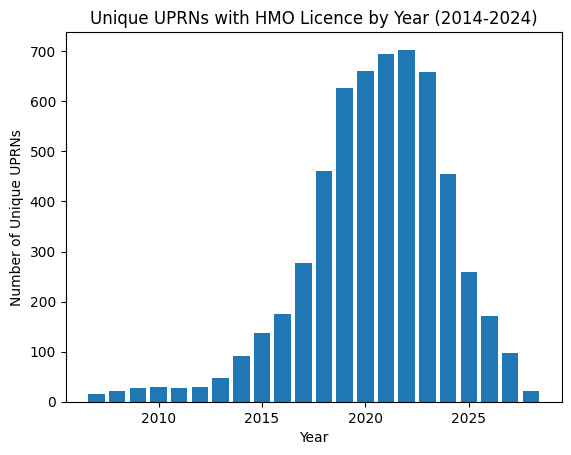

In [ ]:
# uprn_counts_by_year dictionary from previous code
yearshist = list(uprn_counts_by_year_hist.keys())
uprn_counts_hist = list(uprn_counts_by_year_hist.values())

# Create a bar chart
plt.bar(yearshist, uprn_counts_hist)

# Set chart labels and title
plt.xlabel("Year")
plt.ylabel("Number of Unique UPRNs")
plt.title("Unique UPRNs with HMO Licence by Year (2014-2024)")

# Display the chart
plt.show()

# Count of Streets

In [ ]:
# Create a dictionary to store year-wise street name counts
street_name_counts_by_year_hist = {}

for year in yearshist:
    # Filter data for licenses potentially valid in the current year
    year_data_hist = df[
        (df['licence_start'].dt.year <= year) & (df['licence_expiry'].dt.year >= year)
    ]

    # Create a dictionary to store street name counts for this year
    street_name_counts = {}
    for index, row in year_data_hist.iterrows():
        street_name = row["street"]  # Assuming "street" is your column name
        street_name_counts[street_name] = street_name_counts.get(street_name, 0) + 1

    # Add year and street name counts to main dictionary
    street_name_counts_by_year_hist[year] = street_name_counts

# You can now access year-wise street name counts:
# print(street_name_counts_by_year_hist[2023])  # Example for year 2023

# Create DataFrame from dictionary
yearly_df = pd.DataFrame.from_dict(street_name_counts_by_year_hist, orient='index')

# Rename index (optional)
yearly_df.index.name = 'street_name'

# Print transposed DataFrame
print(yearly_df.T)

# Now yearly_dfs is a list of DataFrames for each year with street names and their counts.


street_name      2007.0  2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  \
Station Street      3.0     3.0     3.0     3.0     2.0     2.0     1.0   
Chaplin Close       1.0     1.0     1.0     1.0     1.0     1.0     NaN   
Oxford Street       1.0     1.0     1.0     1.0     NaN     NaN     NaN   
York Road           1.0     1.0     1.0     1.0     1.0     1.0     NaN   
Rectory Road        1.0     1.0     1.0     1.0     1.0     1.0     NaN   
...                 ...     ...     ...     ...     ...     ...     ...   
Seagrave Road       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Archdale Street     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Hall Croft          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Church Lane         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
George Street       NaN     NaN     NaN     NaN     NaN     NaN     NaN   

street_name      2014.0  2015.0  2016.0  ...  2019.0  2020.0  2021.0  2022.0  \
Station Street     

<ipython-input-11-08b42410e2e7>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


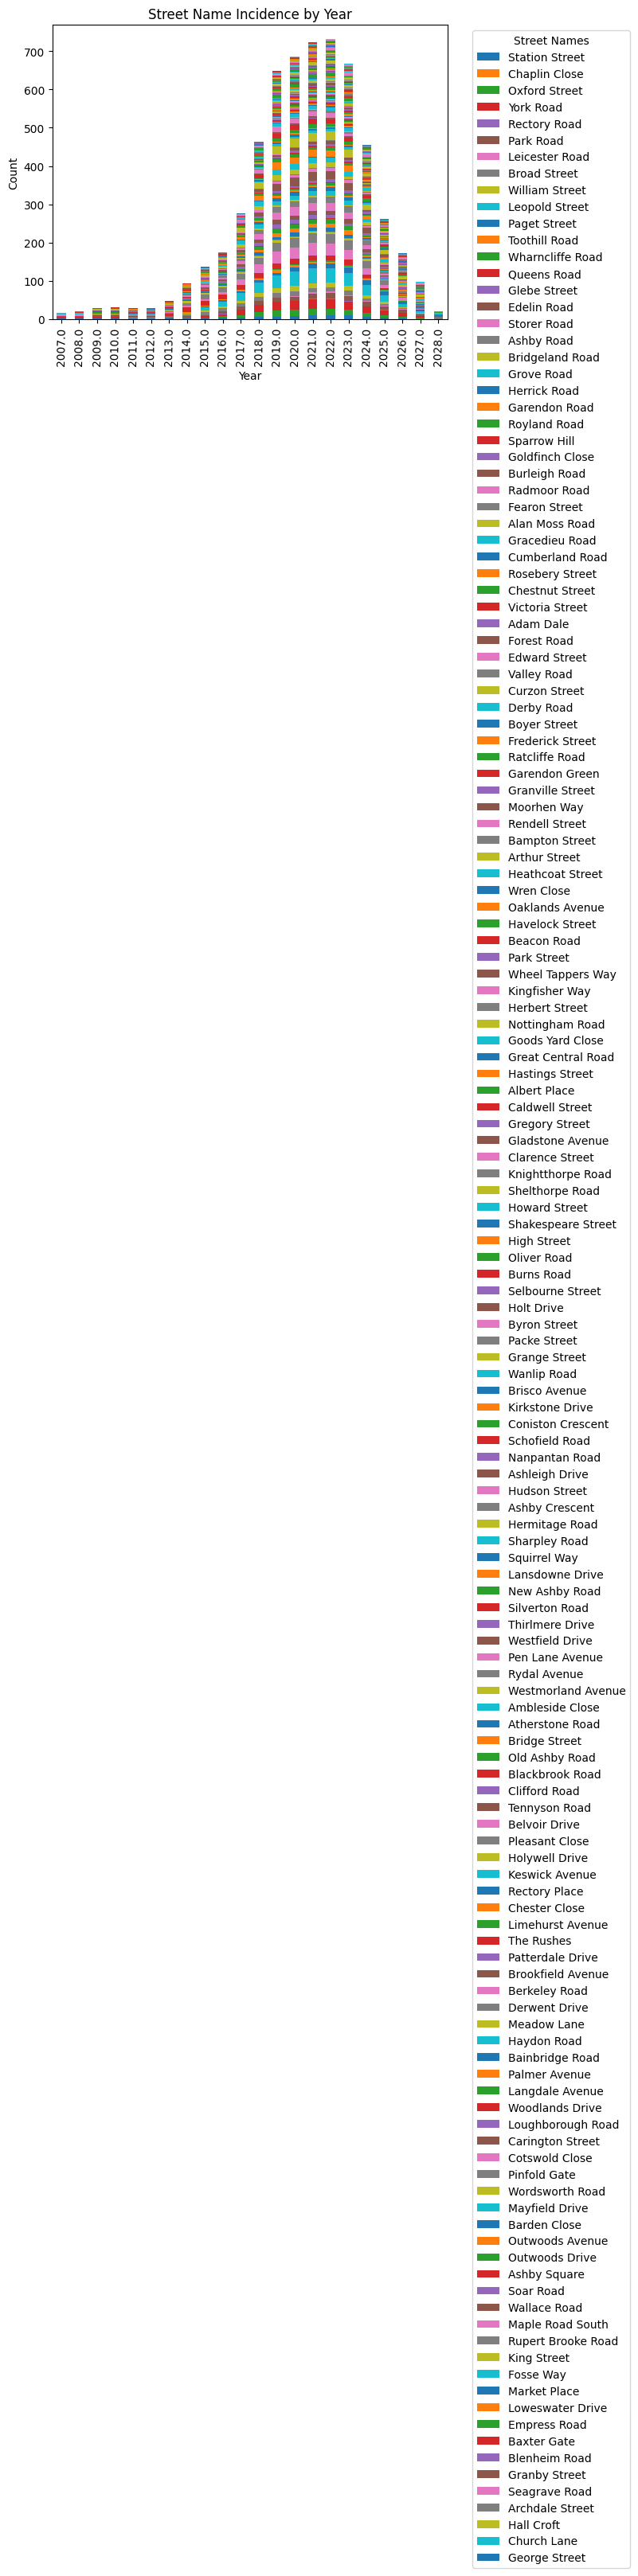

In [ ]:
# Transpose for plotting
yearly_df_T = yearly_df.T

# Double transpose to swap axes
yearly_df_plot = yearly_df.T.transpose()

# Plot (assuming you want to see counts over the years as bars)
yearly_df_plot.plot(kind='bar', stacked=True)  # Change kind to 'bar' for bars
plt.title("Street Name Incidence by Year")
plt.xlabel("Year")
plt.ylabel("Count")  # Change label as street name is now on y-axis
# Place legend outside the plot area
plt.legend(title="Street Names", loc="upper left", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=89)  # Optional: Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Count for Range for 2013 to 2023

In [ ]:
# Define year range (specific years 2013 to 2023)
yearshist10 = pd.date_range(start='2013', end='2023', freq='Y').year.tolist()

# Create a dictionary to store year-wise counts
uprn_counts_by_year_hist10 = {}

for year in yearshist10:
  # Filter data for licenses potentially valid in the current year
  year_data_hist10 = df[
      (df['licence_start'].dt.year <= year) & (df['licence_expiry'].dt.year >= year)
  ]

  # Count the number of unique uprn values for the year
  uprn_counts_by_year_hist10[year] = year_data_hist10['uprn'].nunique()

# Prepare data for chart (assuming you want a bar chart)
data_hist10 = pd.DataFrame.from_dict({'year': list(uprn_counts_by_year_hist10.keys()), 'uprn_count': list(uprn_counts_by_year_hist10.values())})

# Print the year-wise counts
print(uprn_counts_by_year_hist10)


{2013: 47, 2014: 92, 2015: 137, 2016: 175, 2017: 277, 2018: 461, 2019: 626, 2020: 660, 2021: 695, 2022: 703}


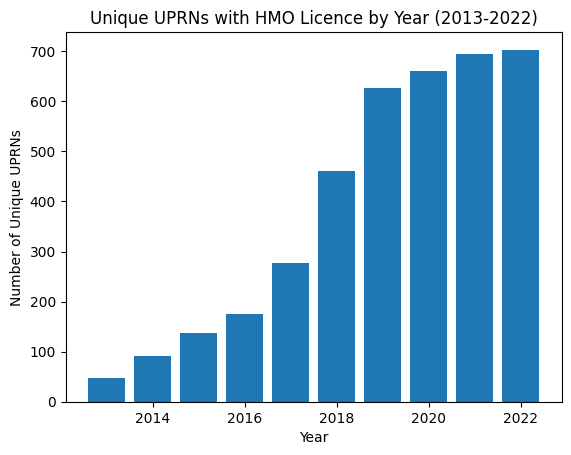

In [ ]:
# uprn_counts_by_year dictionary from previous code
yearshist10 = list(uprn_counts_by_year_hist10.keys())
uprn_counts_hist10 = list(uprn_counts_by_year_hist10.values())

# Create a bar chart
plt.bar(yearshist10, uprn_counts_hist10)

# Set chart labels and title
plt.xlabel("Year")
plt.ylabel("Number of Unique UPRNs")
plt.title("Unique UPRNs with HMO Licence by Year (2013-2022)")

# Display the chart
plt.show()

# Same Analysis also Filtering out properties with >6 beds

In [ ]:
df6 = df.copy()

# Filter rows where Bed is greater than 6
filtered_df6 = df6[df6['Beds'] <= 6]

# Define year range (specific years 2013 to 2023)
yearshist10bed6 = pd.date_range(start='2018', end='2023', freq='Y').year.tolist()

# Create a dictionary to store year-wise counts
uprn_counts_by_year_hist10bed6 = {}

for year in yearshist10bed6:
  # Filter data for licenses potentially valid in the current year
  year_data_hist10bed6 = filtered_df6[
      (filtered_df6['licence_start'].dt.year <= year) & (filtered_df6['licence_expiry'].dt.year >= year)
  ]

  # Count the number of unique uprn values for the year
  uprn_counts_by_year_hist10bed6[year] = year_data_hist10bed6['uprn'].nunique()

# Prepare data for chart (assuming you want a bar chart)
data_hist10bed6 = pd.DataFrame.from_dict({'year': list(uprn_counts_by_year_hist10bed6.keys()), 'uprn_count': list(uprn_counts_by_year_hist10bed6.values())})

# Print the year-wise counts
print(uprn_counts_by_year_hist10bed6)

{2018: 404, 2019: 552, 2020: 582, 2021: 614, 2022: 622}


In [ ]:
# Get descriptive statistics
summary = filtered_df6.describe()
print(summary)

             refno          uprn                  licence_start  \
count   900.000000  8.980000e+02                            897   
mean   4239.926667  8.639732e+10  2018-08-30 18:53:22.675585280   
min     890.000000  1.000400e+10            2007-07-13 00:00:00   
25%    1281.500000  1.000304e+11            2017-10-05 00:00:00   
50%    4708.500000  1.000304e+11            2019-01-24 00:00:00   
75%    6539.250000  1.000305e+11            2020-05-27 00:00:00   
max    8589.000000  1.000320e+11            2023-07-27 00:00:00   
std    2600.004965  3.228837e+10                            NaN   

                      licence_expiry        Beds          HH  
count                            897  900.000000  900.000000  
mean   2023-06-04 16:17:39.531772672    5.454444    5.434444  
min              2010-09-16 00:00:00    0.000000    0.000000  
25%              2022-03-15 00:00:00    5.000000    5.000000  
50%              2023-11-30 00:00:00    6.000000    6.000000  
75%              2

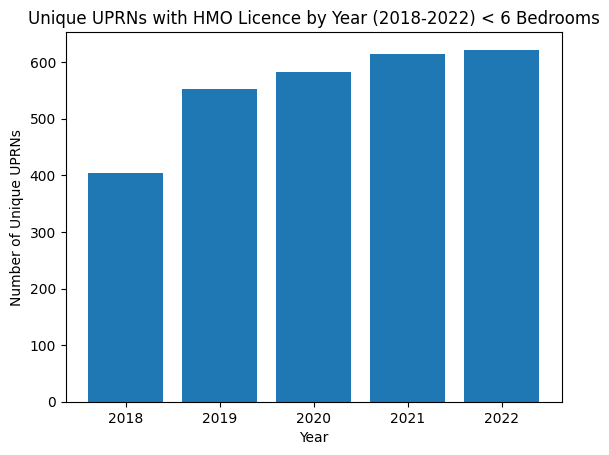

In [ ]:
# uprn_counts_by_year dictionary from previous code
yearshist10bed6list = list(uprn_counts_by_year_hist10bed6.keys())
uprn_counts_hist10bed6 = list(uprn_counts_by_year_hist10bed6.values())

# Create a bar chart
plt.bar(yearshist10bed6list, uprn_counts_hist10bed6)

# Set chart labels and title
plt.xlabel("Year")
plt.ylabel("Number of Unique UPRNs")
plt.title("Unique UPRNs with HMO Licence by Year (2018-2022) < 6 Bedrooms")

# Display the chart
plt.show()

## Street Analysis

In [ ]:
dfstreet = df.copy()

# Filter rows where Bed is greater than 6
filtered_df6_street = dfstreet.loc[dfstreet['Beds'] <= 6]  # Use .loc for conditional filtering

# Define year range (specific years 2013 to 2023)
yearshist10bed6street = pd.date_range(start='2013', end='2023', freq='Y').year.tolist()

# Create a dictionary to store year-wise street name counts
street_name_counts_by_year_hist_limited = {}

for year in yearshist10bed6street:
    # Filter data for licenses potentially valid in the current year
    year_data_hist10bed6_street = filtered_df6_street[
        (filtered_df6_street['licence_start'].dt.year <= year) & (filtered_df6_street['licence_expiry'].dt.year >= year)
    ]

    # Create a dictionary to store street name counts for this year
    street_name_counts_limited = {}
    for index, row in year_data_hist10bed6_street.iterrows():
        street_name_limited = row["street"]  # Assuming "street" is your column name
        street_name_counts_limited[street_name_limited] = street_name_counts_limited.get(street_name_limited, 0) + 1

    # Add year and street name counts to main dictionary
    street_name_counts_by_year_hist_limited[year] = street_name_counts_limited

# You can now access year-wise street name counts:
# print(street_name_counts_by_year_hist[2023])  # Example for year 2023

# Create DataFrame from dictionary
yearly_df_limited = pd.DataFrame.from_dict(street_name_counts_by_year_hist_limited, orient='index')

# Rename index (optional)
yearly_df_limited.index.name = 'street'

# Print transposed DataFrame
print(yearly_df_limited.T)

# Now yearly_dfs is a list of DataFrames for each year with street names and their counts.

street           2013  2014  2015  2016  2017  2018  2019  2020  2021  2022
Burleigh Road     1.0   3.0   5.0   5.0   6.0   8.0  11.0  10.0  10.0  10.0
Storer Road       2.0   5.0   5.0   7.0  13.0  21.0  28.0  26.0  29.0  29.0
Radmoor Road      2.0   3.0   4.0   4.0   7.0  11.0  15.0  17.0  15.0  15.0
Herrick Road      4.0   4.0   4.0   4.0   4.0   5.0   5.0   6.0   5.0   6.0
Fearon Street     3.0   4.0   5.0   5.0   7.0  11.0  15.0  15.0  16.0  17.0
...               ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
Blenheim Road     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   1.0
Granby Street     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   1.0
Seagrave Road     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   1.0
Archdale Street   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0
Church Lane       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0

[136 rows x 10 columns]


<ipython-input-18-52ab43aa0bb0>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


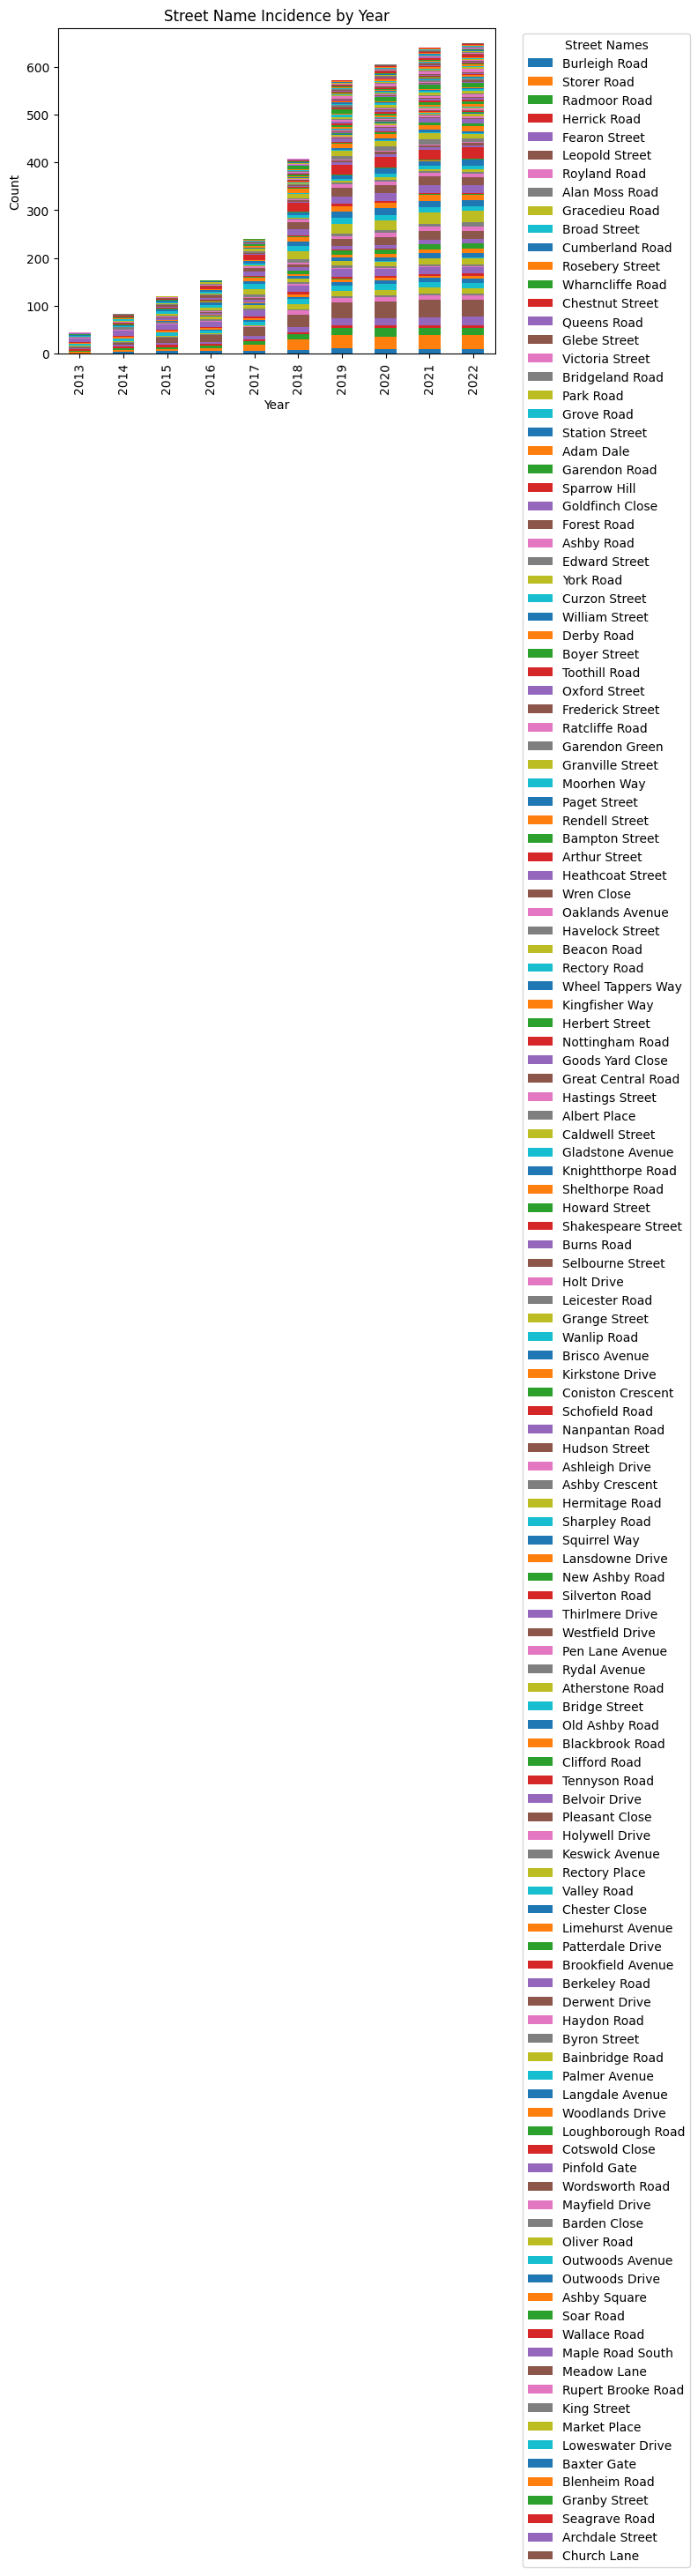

In [ ]:
# Transpose for plotting
yearly_df_limited_T = yearly_df_limited.T

# Double transpose to swap axes
yearly_df_limited_plot = yearly_df_limited.T.transpose()

# Plot (assuming you want to see counts over the years as bars)
yearly_df_limited_plot.plot(kind='bar', stacked=True)  # Change kind to 'bar' for bars
plt.title("Street Name Incidence by Year")
plt.xlabel("Year")
plt.ylabel("Count")  # Change label as street name is now on y-axis
# Place legend outside the plot area
plt.legend(title="Street Names", loc="upper left", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=89)  # Optional: Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the total count for each street across all years
street_total_counts = yearly_df_limited_T.sum(axis=1)

# Filter streets with total count less than 5
filtered_streets_df = yearly_df_limited_T[street_total_counts >= 40]

# Print the filtered DataFrame
print(filtered_streets_df)

street            2013  2014  2015  2016  2017  2018  2019  2020  2021  2022
Burleigh Road      1.0   3.0   5.0   5.0   6.0   8.0  11.0  10.0  10.0  10.0
Storer Road        2.0   5.0   5.0   7.0  13.0  21.0  28.0  26.0  29.0  29.0
Radmoor Road       2.0   3.0   4.0   4.0   7.0  11.0  15.0  17.0  15.0  15.0
Herrick Road       4.0   4.0   4.0   4.0   4.0   5.0   5.0   6.0   5.0   6.0
Fearon Street      3.0   4.0   5.0   5.0   7.0  11.0  15.0  15.0  16.0  17.0
Leopold Street     1.0   3.0  10.0  13.0  19.0  26.0  33.0  35.0  37.0  35.0
Royland Road       1.0   1.0   1.0   1.0   1.0   8.0  10.0  10.0  10.0  10.0
Gracedieu Road     2.0   2.0   2.0   2.0   2.0  11.0  11.0  11.0  13.0  12.0
Broad Street       3.0   5.0   7.0   7.0   7.0  10.0  11.0  12.0  11.0  11.0
Cumberland Road    1.0   1.0   1.0   1.0   3.0   5.0   7.0   9.0   9.0   9.0
Queens Road        7.0  12.0  11.0  12.0  12.0  14.0  16.0  14.0  14.0  13.0
Bridgeland Road    2.0   5.0   4.0   4.0   4.0   4.0   5.0   4.0   4.0   4.0

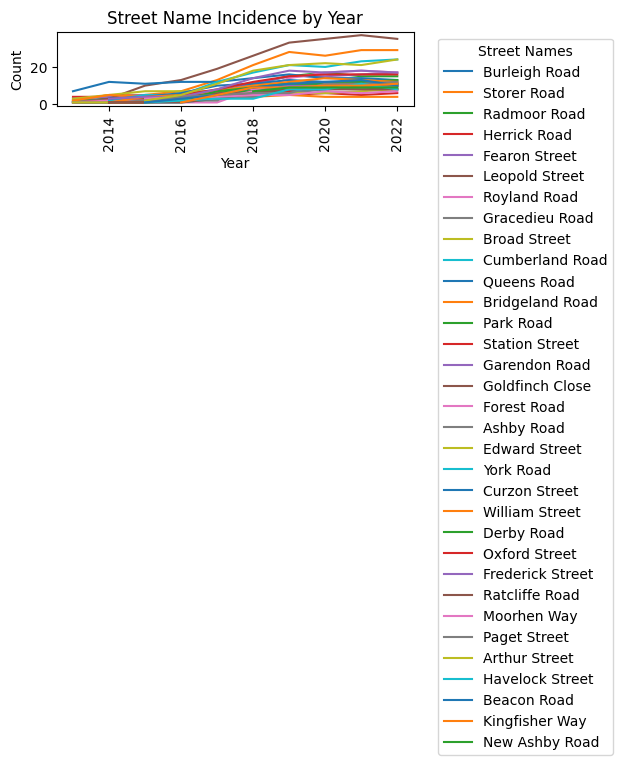

In [ ]:
# Double transpose to swap axes
yearly_df_limited_plot_streets = filtered_streets_df.transpose()

# Plot (assuming you want to see counts over the years as bars)
yearly_df_limited_plot_streets.plot(kind='line')  # Change kind to 'bar' for bars
plt.title("Street Name Incidence by Year")
plt.xlabel("Year")
plt.ylabel("Count")  # Change label as street name is now on y-axis
# Place legend outside the plot area
plt.legend(title="Street Names", loc="upper left", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=89)  # Optional: Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
.import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Create a copy to avoid modifying the original DataFrame
df_heatmap = filtered_streets_df.copy()

# Pivot table to arrange data for heatmap (streets as rows, years as columns)
heatmap_data = df_heatmap.pivot_table(values='counts', index='street', columns='licence_start.dt.year')

# Create heatmap using Seaborn
sns.heatmap(heatmap_data, cmap="YlGnBu")  # Adjust 'YlGnBu' for desired colormap
plt.title("HMO License Counts by Street and Year")
plt.xlabel("Year")
plt.ylabel("Street")
plt.show()


KeyError: 'counts'

# Current Register

In [ ]:
xlsx_path_current = "/content/drive/MyDrive/Documents/Houses/9 Forest Road/Planning Objection/Round 2/CBCHMOregister.xlsx"  # Replace with the actual path
df_current = pd.read_excel(xlsx_path_current, parse_dates=['licence_start', 'licence_expiry'])

print(df_current.head(20))  # View the first few rows of the data

In [ ]:
# Get descriptive statistics
summary = df_current.describe()
print(summary)

In [ ]:

# Define year range (consider all years for filtering based on licence dates)
years_current = pd.date_range(start='2018', end='2029', freq='Y').year.tolist()

# Create a dictionary to store year-wise counts
uprn_counts_by_year_current = {}

for year in years_current:
  # Filter data for licenses potentially valid in the current year
  year_data = df_current[
      (df_current['licence_start'].dt.year <= year) & (df_current['licence_expiry'].dt.year >= year)
  ]

  # Count the number of unique uprn values for the year
  uprn_counts_by_year_current[year] = year_data['uprn'].nunique()

# Prepare data for chart (assuming you want a bar chart)
data_current = pd.DataFrame.from_dict({'year': list(uprn_counts_by_year_current.keys()), 'uprn_count': list(uprn_counts_by_year_current.values())})

# Print the year-wise counts
print(uprn_counts_by_year_current)

In [ ]:
# uprn_counts_by_year dictionary from previous code
yearsx = list(uprn_counts_by_year_current.keys())
uprn_countsx = list(uprn_counts_by_year_current.values())

# Create a bar chart
plt.bar(yearsx, uprn_countsx)

# Set chart labels and title
plt.xlabel("Year")
plt.ylabel("Number of Unique UPRNs")
plt.title("Unique UPRNs with HMO Licence by Year (2018-2029)")
# Rotate x-axis labels for readability (optional)
plt.xticks(rotation=45)  # Adjust rotation angle as desired

# Display the chart
plt.show()

In [ ]:
# Create a dictionary to store street name counts per year
street_counts_by_year = {}

for year in years_current:
  # Filter data for licenses potentially valid in the current year
  year_data = df_current[
      (df_current['licence_start'].dt.year <= year) & (df_current['licence_expiry'].dt.year >= year)
  ]

  # Count occurrences of each street name in the year
  street_counts = year_data['street'].value_counts().to_dict()
  street_counts_by_year[year] = street_counts

# Print the table (one way to display the results)
for year, street_counts in street_counts_by_year.items():
  print(f"\nYear: {year}")
  print(pd.DataFrame.from_dict(street_counts, orient='index', columns=['Count']))

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df_current' with columns 'street' (street names),
# 'licence_start' (license start date), and 'licence_expiry' (license expiry date)

# Define years of interest (replace with your actual years)
years_of_interest = range(2018, 2023)  # Example range, adjust as needed

# Create an empty DataFrame to store street counts by year
street_counts_by_year = pd.DataFrame(columns=years_of_interest)  # Empty DataFrame

for year in years_of_interest:
  # Filter data for licenses potentially valid in the current year
  year_data = df_current[
      (df_current['licence_start'].dt.year <= year) & (df_current['licence_expiry'].dt.year >= year)
  ]

  # Count occurrences of each street name in the year (handle potential zero counts)
  street_counts = year_data['street'].value_counts().fillna(0).to_frame(name=year).transpose()

  # Update or append street counts to the DataFrame (flexible approach)
  if year not in street_counts_by_year.index:
      street_counts_by_year = street_counts_by_year.append(street_counts)
  else:
      street_counts_by_year.update(street_counts)

# Print the table using tabulate or pandas display options
print(street_counts_by_year.to_string())  # Basic table representation
# Consider: street_counts_by_year.to_html()  # HTML output for web integration
#          street_counts_by_year.style.set_properties(...)  # Customize table formatting with pandas styling

# Optionally, for further customization, use external libraries like tabulate:
# from tabulate import tabulate
# print(tabulate(street_counts_by_year.to_dict(), headers=('Street',) + tuple(years_of_interest), tablefmt='grid'))


In [ ]:
import seaborn as sns

# Assuming street_counts_by_year is the DataFrame from the previous code

# Reshape data for Seaborn (optional, but recommended for stacked line chart)
street_counts_long = pd.melt(street_counts_by_year.reset_index(), id_vars='index', var_name='Year', value_name='Count')  # Adjust variable names if needed

# Create the stacked line chart
sns.lineplot(data=street_counts_long, x='index', y='Count', hue='Year')
plt.title('Stacked Line Chart: Street Counts by Year')
plt.xlabel('Year')
plt.ylabel('Street Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability (optional)
plt.legend(title='Year')  # Adjust legend title if needed
plt.tight_layout()
plt.show()

In [ ]:
# Create the stacked area chart
plt.figure(figsize=(12, 6))  # Adjust figure size as desired
street_counts_by_year.plot(kind='area', stacked=True, colormap='tab20')  # Adjust colormap as desired
plt.xlabel('Year')
plt.ylabel('Street Count')
plt.title('Stacked Area Chart: Street Counts by Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability (optional)
plt.legend(title='Year')  # Adjust legend title if needed
plt.grid(True)  # Add grid lines (optional)
plt.tight_layout()
plt.show()